<a href="https://colab.research.google.com/github/learninglee1/learninglee1.github.io/blob/master/%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC_%ED%99%98%EC%9C%A8_%EC%9B%90%EC%9C%A0_%EC%A3%BC%EA%B0%80_web_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

네이버 웹 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EA%B8%88%EB%A6%AC+%EB%89%B4%EC%8A%A4&oquery=%EA%B8%88%EB%A6%AC&tqi=iuBollp0J1sssPITAH8ssssssY8-236223"
response = requests.get(url)

html = response.text
soup = BeautifulSoup(html, 'html.parser')

links = soup.select(".news_tit") # 결과는 리스트로 나옴

for link in links:
  title=link.text # 태그안에 텍스트 요소를 가져온다
  url =link.attrs['href'] #href의 속성값을 가져온다
  print(title,url)

美, 10회 연속 금리인상 뒤 동결…연내 추가 인상 강력 시사(종합2보) https://www.yna.co.kr/view/AKR20230615005752071?input=1195m
美 연준, ‘매파적 금리 동결’… 하반기 두차례 베이비스텝 가능성 시사 http://www.segye.com/content/html/2023/06/15/20230615502500.html?OutUrl=naver
‘오락가락’ 금리에 차주들 갈팡질팡…“주담대 너 왜 또 오르냐” http://www.edaily.co.kr/news/newspath.asp?newsid=01161126635642376
ECB 기준금리 8연속 인상에 4% 도달…"재인상 가능성 높아" https://www.nocutnews.co.kr/news/5960480


Could not find headline news list


환율정보 크롤링 하고 엑셀로 저장

In [ ]:
#https://wikidocs.net/172650

from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd


home='http://finance.naver.com'
url = home+"/marketindex/"
html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")
iframe_src = soup.select_one("#frame_ex1").attrs["src"]
print(iframe_src)
html = urlopen(home+f"{iframe_src}")
soup = BeautifulSoup(html, "html.parser")

table=soup.find("table","tbl_exchange")
tbody=table.find("tbody")
trs=tbody.find_all("tr")

header=["통화명","매매기준율","사실때","파실때","보내실때","받으실때","미화환산율"]
print(header)
result=[]
for tr in trs:
    tds=tr.find_all("td")
    data=[]
    for td in tds:
        data.append(td.get_text().strip())
    result.append(data)
    print(data)

df = pd.DataFrame(result)
df.to_excel ('exchange.xlsx', index = False, header=header)




/marketindex/exchangeList.naver
['통화명', '매매기준율', '사실때', '파실때', '보내실때', '받으실때', '미화환산율']
['미국 USD', '1,310.00', '1,332.92', '1,287.08', '1,322.80', '1,297.20', '1.000']
['유럽연합 EUR', '1,420.17', '1,448.43', '1,391.91', '1,434.37', '1,405.97', '1.084']
['일본 JPY (100엔)', '986.48', '1,003.74', '969.22', '996.14', '976.82', '0.753']
['중국 CNY', '190.57', '200.09', '181.05', '192.47', '188.67', '0.146']
['홍콩 HKD', '166.88', '170.16', '163.60', '168.54', '165.22', '0.127']
['대만 TWD', '42.90', '48.51', '38.61', 'N/A', 'N/A', '0.033']
['영국 GBP', '1,615.23', '1,647.05', '1,583.41', '1,631.38', '1,599.08', '1.233']
['오만 OMR', '3,402.51', '3,705.33', '3,198.36', 'N/A', 'N/A', '2.597']
['캐나다 CAD', '968.72', '987.80', '949.64', '978.40', '959.04', '0.740']
['스위스 CHF', '1,431.30', '1,459.49', '1,403.11', '1,445.61', '1,416.99', '1.093']
['스웨덴 SEK', '126.20', '129.29', '123.11', '127.46', '124.94', '0.096']
['호주 AUD', '875.80', '893.05', '858.55', '884.55', '867.05', '0.669']
['뉴질랜드 NZD', '819.08', '835

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPytho

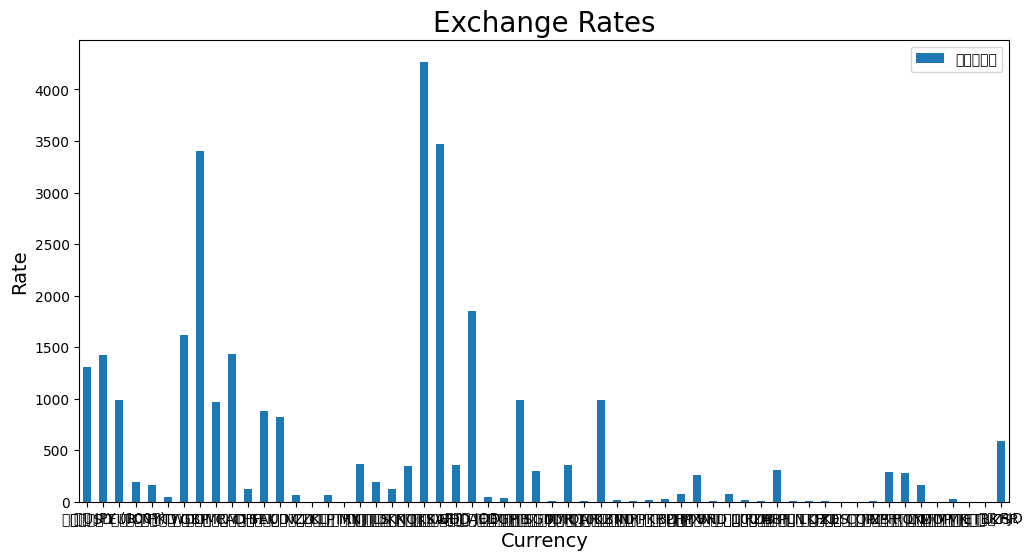

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

home='http://finance.naver.com'
url = home+"/marketindex/"
html = urlopen(url)
soup = BeautifulSoup(html, "html.parser")
iframe_src = soup.select_one("#frame_ex1").attrs["src"]
html = urlopen(home+f"{iframe_src}")
soup = BeautifulSoup(html, "html.parser")

table=soup.find("table","tbl_exchange")
tbody=table.find("tbody")
trs=tbody.find_all("tr")

header=["통화명","매매기준율","사실때","파실때","보내실때","받으실때","미화환산율"]
result=[]
for tr in trs:
    tds=tr.find_all("td")
    data=[]
    for td in tds:
        data.append(td.get_text().strip())
    result.append(data)

# 데이터프레임으로 변환
df = pd.DataFrame(result, columns=header)

# "매매기준율" 컬럼을 수치형 데이터로 변환
df["매매기준율"] = pd.to_numeric(df["매매기준율"].str.replace(",", ""))

# 인덱스를 "통화명"으로 지정
df.set_index("통화명", inplace=True)

# 그래프 그리기
ax = df.plot(kind='bar', figsize=(12, 6), rot=0)
ax.set_title('Exchange Rates', fontsize=20)
ax.set_xlabel('Currency', fontsize=14)
ax.set_ylabel('Rate', fontsize=14)
plt.show()


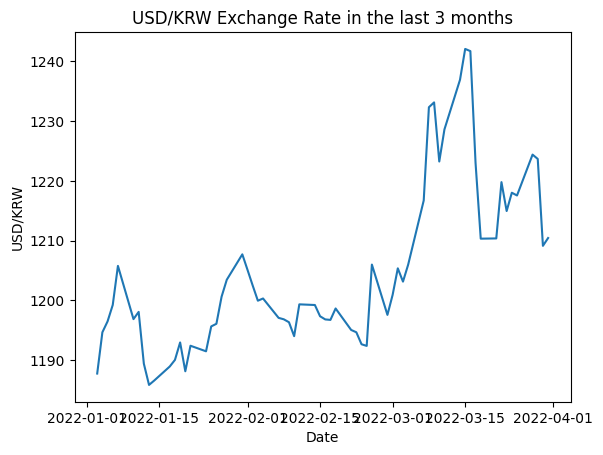

In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# 미국 환율 정보 불러오기 (USD/KRW)
usd_krw = fdr.DataReader("USD/KRW", "2022-01-01", "2022-03-31")

# 미국 환율 정보 그래프 그리기
plt.plot(usd_krw.index, usd_krw['Close'])
plt.xlabel('Date')
plt.ylabel('USD/KRW')
plt.title('USD/KRW Exchange Rate in the last 3 months')
plt.show()


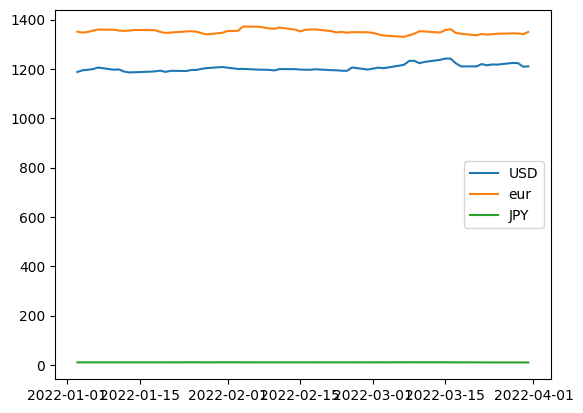

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 미국 달러(USD)에 대한 환율 추이
usd = fdr.DataReader('USD/KRW', '2022-01-01', '2022-03-31')
plt.plot(usd['Close'])

# EUR/KRW 환율
eur = fdr.DataReader('EUR/KRW', '2022-01-01', '2022-03-31')
plt.plot(eur['Close'], label='EUR')

# 일본 엔화(JPY)에 대한 환율 추이
jpy = fdr.DataReader('JPY/KRW', '2022-01-01', '2022-03-31')
plt.plot(jpy['Close'])

plt.legend(['USD', 'eur', 'JPY'])
plt.show()


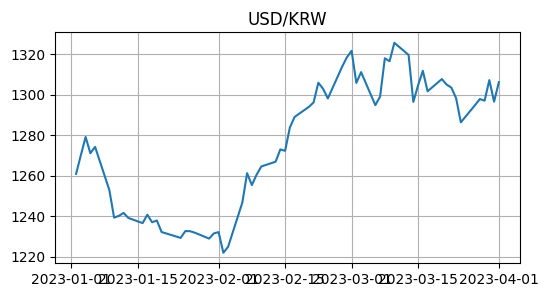

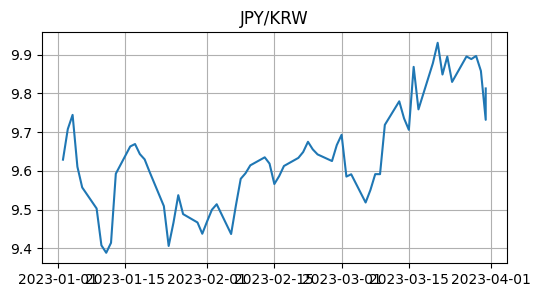

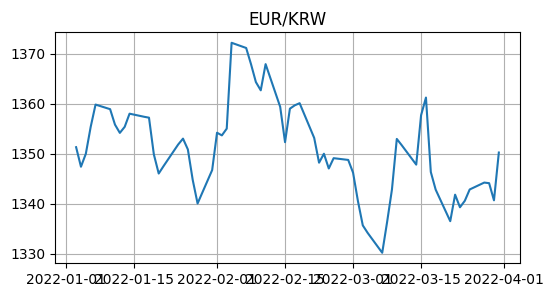

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 미국 달러 환율 데이터 가져오기
usd = fdr.DataReader('USD/KRW', '2023-01-01')

# 일본 엔화 환율 데이터 가져오기
jpy = fdr.DataReader('JPY/KRW', '2023-01-01')

# EUR/KRW 환율
eur = fdr.DataReader('EUR/KRW', '2022-01-01', '2022-03-31')


# 미국 달러 환율 그래프 그리기
plt.figure(figsize=(6, 3))
plt.plot(usd['Close'])
plt.title('USD/KRW')
plt.grid(True)
plt.show()

# 일본 엔화 환율 그래프 그리기
plt.figure(figsize=(6, 3))
plt.plot(jpy['Close'])
plt.title('JPY/KRW')
plt.grid(True)
plt.show()

# 유로화 환율 그래프 그리기
plt.figure(figsize=(6, 3))
plt.plot(eur['Close'])
plt.title('EUR/KRW')
plt.grid(True)
plt.show()


            Open  High   Low  Close  Adj Close      Volume
Date                                                      
2005-12-06  2.54  2.58  2.34   2.40       2.40  48228300.0
2005-12-07  2.42  2.48  2.14   2.18       2.18   4774300.0
2005-12-08  2.20  2.38  2.18   2.32       2.32   3105200.0
2005-12-09  2.35  2.40  2.30   2.34       2.34    662900.0
2005-12-12   NaN   NaN   NaN    NaN        NaN         NaN
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-01-03  84.550003  84.800003  83.489998  84.589996  82.074615  5327000
2022-01-04  84.430000  85.290001  84.180000  84.870003  82.346283  4405100
2022-01-05  84.709999  85.610001  84.709999  85.220001  82.685867  4445900
2022-01-06  84.980003  85.610001  84.160004  84.660004  82.142525  4154800
2022-01-07  84.779999  84.930000  84.110001  84.440002  81.929070  2818200


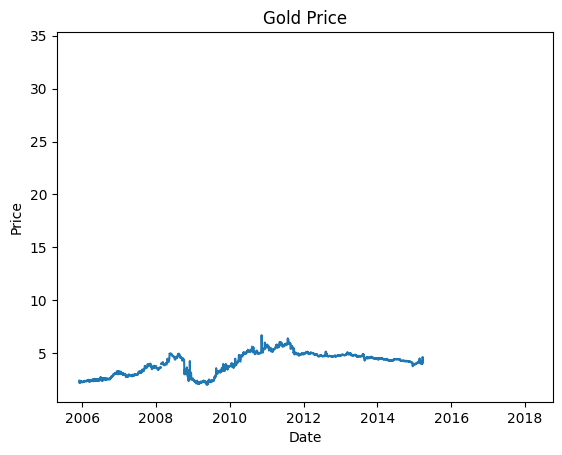

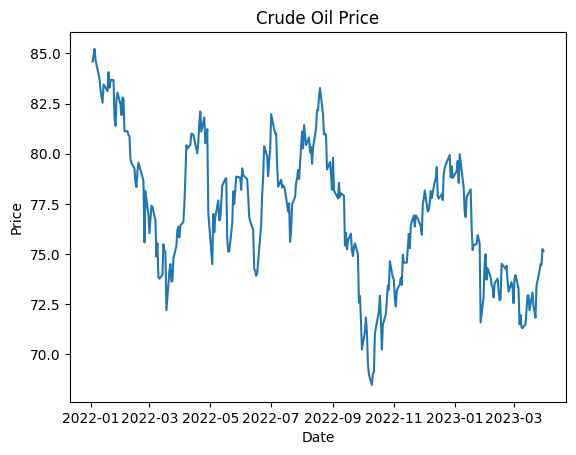

In [ ]:
import FinanceDataReader as fdr

import matplotlib.pyplot as plt


# 3년치 금 가격 가져오기
gold_price = fdr.DataReader('GC', '2000-01-01')
print(gold_price.head())

# WTI 원유 가격 가져오기
oil_price = fdr.DataReader('CL', '2022-01-01')
print(oil_price.head())

#위 코드에서 CL은 WTI 원유를 의미하는 심볼입니다. 이외에도 BZ는 브렌트 원유, UHN은 대만 중질유

# 금 가격 그래프 그리기
plt.plot(gold_price['Close'])
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 원유 가격 그래프 그리기
plt.plot(oil_price['Close'])
plt.title('Crude Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

주가정보 시계열로 분석

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
             Open   High    Low  Close    Volume    Change
Date                                                      
2023-06-12  72100  72400  70800  71000  12064287 -0.013889
2023-06-13  71700  72200  71600  72000  13227285  0.014085
2023-06-14  72100  72200  71100  71900  12541046 -0.001389
2023-06-15  72100  72300  71300  71500  13614994 -0.005563
2023-06-16  71800  71900  70900  71800  14267379  0.004196


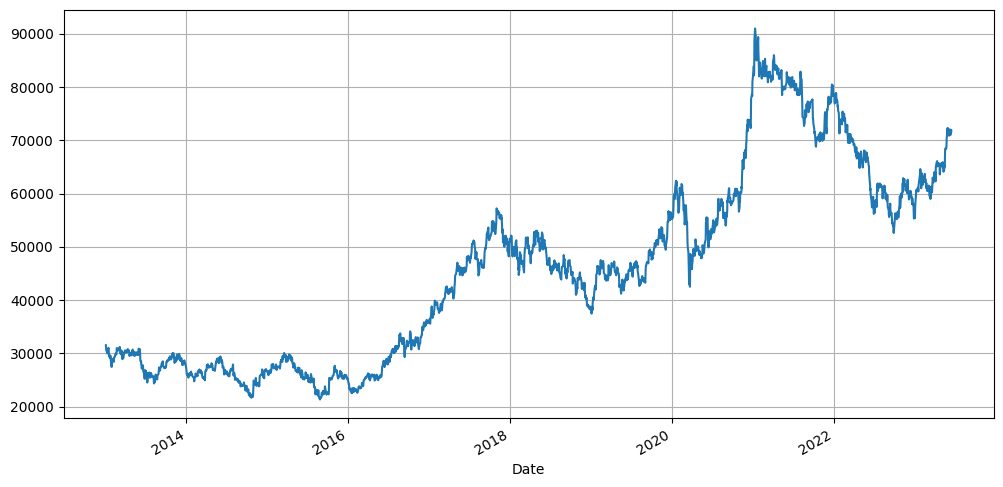

In [ ]:
!pip install finance-datareader


import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt


#삼성전자
sdf = fdr.DataReader('005930','20130101')
print(sdf.tail())
sdf['Close'].plot(figsize=(12,6),grid=True)
plt.show()





In [ ]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as web
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


display(sdf.head(), sdf.tail())

sdf = sdf.dropna()
sdf['Open-Close'] = sdf.Open - sdf.Close
sdf['High-Low'] = sdf.High - sdf.Low
X = sdf[['Open-Close', 'High-Low']]
X.head()


Y = np.where( sdf['Close'].shift(-1) > sdf['Close'],1,-1)
Y



train_pct = 0.7

split = int( train_pct*len(sdf) )

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

# 위의 코드는 간략하게
#X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]



knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, Y_train)
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('Train data Accuracy: %.2f' % accuracy_train)
print('Test  data Accuracy: %.2f' % accuracy_test)

,Open,High,Low,Close,Volume,Change,Open-Close,High-Low
Date,,,,,,,,
2013-01-02,30660,31519,30540,31520,229274,0.035480,-860,979
2013-01-03,31640,31680,30860,30860,284927,-0.020939,780,820
2013-01-04,30800,30840,30199,30500,260120,-0.011666,300,641
2013-01-07,30300,30560,29999,30400,252436,-0.003279,-100,561
2013-01-08,30260,30340,29960,30000,276757,-0.013158,260,380


,Open,High,Low,Close,Volume,Change,Open-Close,High-Low
Date,,,,,,,,
2023-04-07,63800,65200,63800,65000,27476120,0.043339,-1200,1400
2023-04-10,64800,66300,64700,65700,18777166,0.010769,-900,1600
2023-04-11,66200,66200,65400,65900,16323183,0.003044,300,800
2023-04-12,65800,66200,65300,66000,15021313,0.001517,-200,900
2023-04-13,65600,66100,65400,65900,5880641,-0.001515,-300,700


Train data Accuracy: 0.59
Test  data Accuracy: 0.50


In [ ]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
import pandas_datareader.famafrench as ff

datasets = ff.get_available_datasets()
print('No. of datasets:{0}'.format(len(datasets)))

df_10_industry = [dataset for dataset in datasets if '10' in dataset and 'Industry' in dataset]
print(df_10_industry)

ds_industry = web.DataReader(df_10_industry[0],'famafrench',start='2017-06-23',end='2019-11-01') # Taking [0] as extract


print(type(ds_industry))
ds_industry.keys()


print(ds_industry['DESCR'])


ds_industry[0].head()



df_5_factor = [dataset for dataset in datasets if '5' in dataset and 'Factor' in dataset]
print(df_5_factor)

ds_factors = web.DataReader(df_5_factor[0],'famafrench',start='2017-06-23',end='2019-11-01') # Taking [0] as extracting 1F-F-Research_Data_Factors_2x3')
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))
ds_factors[0].head()


No. of datasets:297
['10_Industry_Portfolios', '10_Industry_Portfolios_Wout_Div', '10_Industry_Portfolios_daily']
<class 'dict'>
10 Industry Portfolios
----------------------

This file was created by CMPT_IND_RETS using the 202302 CRSP database. It contains value- and equal-weighted returns for 10 industry portfolios. The portfolios are constructed at the end of June. The annual returns are from January to December. Missing data are indicated by -99.99 or -999. Copyright 2023 Kenneth R. French

  0 : Average Value Weighted Returns -- Monthly (30 rows x 10 cols)
  1 : Average Equal Weighted Returns -- Monthly (30 rows x 10 cols)
  2 : Average Value Weighted Returns -- Annual (3 rows x 10 cols)
  3 : Average Equal Weighted Returns -- Annual (3 rows x 10 cols)
  4 : Number of Firms in Portfolios (30 rows x 10 cols)
  5 : Average Firm Size (30 rows x 10 cols)
  6 : Sum of BE / Sum of ME (3 rows x 10 cols)
  7 : Value-Weighted Average of BE/ME (3 rows x 10 cols)
['F-F_Research_Data_5_Facto

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2017-06,0.78,2.57,1.48,-2.25,0.01,0.06
2017-07,1.87,-1.66,-0.24,-0.69,-0.11,0.07
2017-08,0.16,-1.83,-2.09,0.15,-2.37,0.09
2017-09,2.51,4.77,3.12,-1.46,1.67,0.09
2017-10,2.25,-1.93,0.21,0.92,-3.24,0.09


In [ ]:
# 이용가능한 데이터셋을 구한다
datasets = ff.get_available_datasets()


# 월간 3팩터(datasets[0])를 구한다
df_3_factor = datasets[0]
print(df_3_factor)

# 1980년 2월부터 2019년 6월 팩터 데이터를 다운로드한다
ds_factors = web.DataReader(df_3_factor,'famafrench', start='1980-02-01', end='2019-06-30')
print('\nKEYS\n{0}'.format(ds_factors.keys()))
print('DATASET DESCRIPTION \n {0}'.format(ds_factors['DESCR']))


print(ds_factors)

F-F_Research_Data_Factors

KEYS
dict_keys([0, 1, 'DESCR'])
DATASET DESCRIPTION 
 F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202302 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2023 Kenneth R. French

  0 : (473 rows x 4 cols)
  1 : Annual Factors: January-December (40 rows x 4 cols)
{0:          Mkt-RF   SMB   HML    RF
Date                             
1980-02   -1.22 -1.85  0.61  0.89
1980-03  -12.90 -6.64 -1.01  1.21
1980-04    3.97  1.05  1.06  1.26
1980-05    5.26  2.13  0.38  0.81
1980-06    3.06  1.66 -0.76  0.61
...         ...   ...   ...   ...
2019-02    3.40  2.05 -2.67  0.18
2019-03    1.10 -3.03 -4.10  0.19
2019-04    3.97 -1.74  2.14  0.21
2019-05   -6.94 -1.31 -2.35  0.21
2019-06    6.93  0.27 -0.72  0.18

[473 rows x 4 columns], 1:       Mkt-RF    SMB    HML     RF
Date                             
1980   22.13   5.66 -24.61  11.24
1981  -18.13   7.11  25.04  14.71


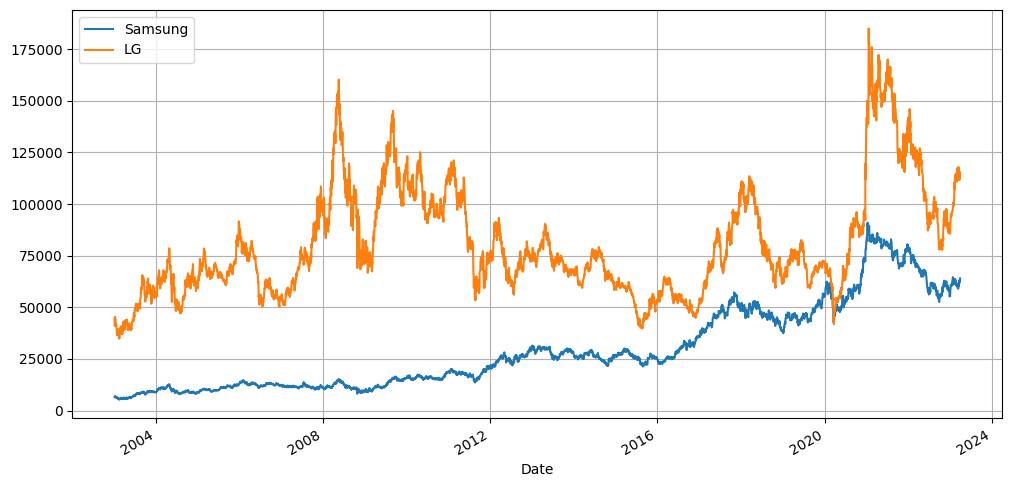

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 삼성전자와 LG전자 주가 데이터 가져오기
sdf = fdr.DataReader('005930','20030101')
ldf = fdr.DataReader('066570','20030101')

# 두 데이터프레임 합치기
df = pd.concat([sdf['Close'], ldf['Close']], axis=1)
df.columns = ['Samsung', 'LG']

# 그래프 그리기
df.plot(figsize=(12,6),grid=True)
plt.show()


            Samsung  LG Electronics  LG Innotek
Date                                           
2013-01-02    31520           77500       86900
2013-01-03    30860           78500       87900
2013-01-04    30500           78700       87800
2013-01-07    30400           78700       86900
2013-01-08    30000           78400       84900
...             ...             ...         ...
2023-06-12    71000          125600      308500
2023-06-13    72000          124400      308000
2023-06-14    71900          124700      305500
2023-06-15    71500          123600      317000
2023-06-16    71800          124500      313500

[2574 rows x 3 columns]


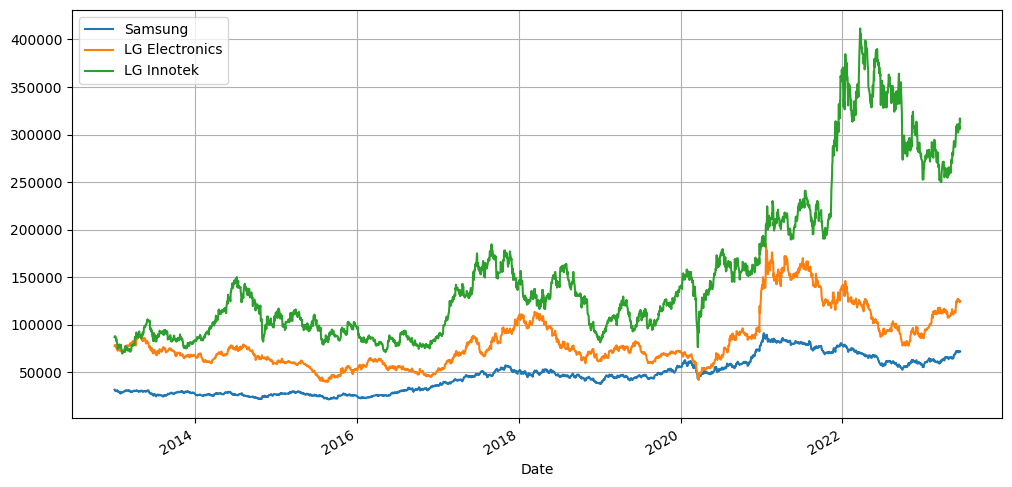

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 삼성전자, LG전자, LG이노텍 주가 데이터 가져오기
sdf = fdr.DataReader('005930','20130101')
ldf = fdr.DataReader('066570','20130101')
lndf = fdr.DataReader('011070', '20130101')

# 데이터프레임 합치기
df = pd.concat([sdf['Close'], ldf['Close'], lndf['Close']], axis=1)
df.columns = ['Samsung', 'LG Electronics', 'LG Innotek']

print(df)

# 그래프 그리기
df.plot(figsize=(12,6),grid=True)
plt.show()


In [ ]:
#https://wikidocs.net/172950